In [1]:
import math
from functools import partial

from scipy.optimize import basinhopping, shgo, minimize_scalar
import splinecloud_scipy as sc
from scipy.interpolate import splprep, UnivariateSpline
from geomdl import fitting
from geomdl import BSpline
import cadquery as cq
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
# profile_data = sc.LoadSubset("sbt_XcZUwUj5CuZf")
# profile_data = sc.LoadSubset("sbt_tnZbUHv0uTGO")
# profile_data = sc.LoadSubset("sbt_38mLwhFXLXlD")
profile_data = sc.LoadSubset("sbt_oll9JwctqjUx")

In [3]:
airfoil_profile_points = profile_data.values.tolist()

## Profile curve

In [8]:
profile_curve = fitting.approximate_curve(airfoil_profile_points, 3, ctrlpts_size=16, centripetal=True)

In [9]:
spline_knotspace = np.linspace(0, 1, 300)
spline_points = [profile_curve.evaluate_single(k) for k in spline_knotspace]

In [10]:
spl_x, spl_y = zip(*spline_points)
px, py = zip(*airfoil_profile_points)

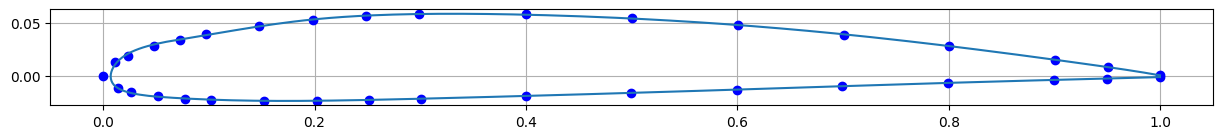

In [11]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.plot(px, py, 'bo')
plt.plot(spl_x, spl_y)
plt.grid()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.show()